In [ ]:
**Emisije u vode**

In [ ]:
Podaci preuzeti sa data.org.rs

**Izvor podataka:** Agencija za zaštitu životne sredine

Agencija za zaštitu životne sredine, kao organ u sastavu Ministarstva zaštite životne sredine, sa svojstvom pravnog lica, obavlja stručne poslove koji se odnose na: razvoj, usklađivanje i vođenje nacionalnog informacionog sistema zaštite životne sredine (praćenje stanja činilaca životne sredine kroz…

In [ ]:
Link prema skupu podataka:https://data.gov.rs/sr/datasets/emisije-u-vode/

In [ ]:
Permalink: https://data.gov.rs/sr/datasets/emisije-u-vode/

In [ ]:
**Datum preuzimanja**: 30.05.2025 godine

**Opis**

Ovaj set podataka sadrži informacije o emisijama zagađujućih materija u vode u Republici Srbiji, prikupljene iz Nacionalnog registra izvora zagađivanja. Podaci obuhvataju različite privredne subjekte koji ispuštaju zagađujuće materije u vodene resurse, uz detalje o vrsti i količini emisija.

Atributi seta podataka
Godina – Godina za koju se podaci odnose
Okrug – Naziv okruga u kojem se nalazi izvor emisije
Region – Naziv regiona u kojem se nalazi izvor emisije
Opština – Naziv opštine u kojoj se nalazi izvor emisije
Mesto – Naziv mesta u kojem se nalazi izvor emisije
Šifra Mesta – Jedinstvena šifra mesta u skladu sa zvaničnim kodiranjem
Pretežna delatnost – Osnovna delatnost preduzeća koje ispušta zagađujuće materije
PIB – Poreski identifikacioni broj preduzeća
Preduzeće – Naziv preduzeća koje ispušta zagađujuće materije
Nacionalni ID – Jedinstveni identifikator preduzeća u Nacionalnom registru izvora zagađenja
Postrojenje – Naziv postrojenja koje ispušta zagađujuće materije
PRTR kod – Kod u skladu sa Protokolom o registrima ispuštanja i prenosa zagađivača (PRTR)
Zagađujuća materija – Naziv zagađujuće materije koja se ispušta u vode
Količina (kg/god) – Količina emitovane zagađujuće materije u kilogramima godišnje

Ovi podaci omogućavaju analizu izvora zagađenja vodenih resursa, praćenje uticaja industrijskih postrojenja na vodene ekosisteme i donošenje mera za očuvanje kvaliteta voda.

In [1]:
# Učitavanje potrebnih biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Setup Complete!')

Setup Complete!


In [24]:
# Učitavanje podataka
df = pd.read_excel("emisije_vode.xlsx")
# Prikaz prvih nekoliko redova
# print(df.head())

In [25]:
# Prikaz prvih redova u tabelarnom formatu
df.head(3)

,Godina,Okrug,Region,Opstina,Mesto,SifraMesta,PreteznaDelatnost,PIB,Preduzece,NacionalniId,Postrojenje,PRTRKod,ZagadjujucaMaterija,KolicinaKgGod
0,2012,Borski okrug,Region Južne i Istočne Srbije,Bor,Bor,706418,"0729 Eksploatacija ruda ostalih crnih, obojeni...",100629205,"Rudarsko-topioniÄarski basen Bor, RBB Bor D.O.O",100629205/2,"Rudarsko - topioniÄarski basen Bor, RBB - Rud...",3.(b),Arsen i jedinjenja arsena (kao As),0.0
1,2012,Borski okrug,Region Južne i Istočne Srbije,Bor,Bor,706418,"0729 Eksploatacija ruda ostalih crnih, obojeni...",100629205,"Rudarsko-topioniÄarski basen Bor, RBB Bor D.O.O",100629205/2,"Rudarsko - topioniÄarski basen Bor, RBB - Rud...",3.(b),Bakar i jedinjenja bakra (kao Cu),2771.4
2,2012,Borski okrug,Region Južne i Istočne Srbije,Bor,Bor,706418,"0729 Eksploatacija ruda ostalih crnih, obojeni...",100629205,"Rudarsko-topioniÄarski basen Bor, RBB Bor D.O.O",100629205/2,"Rudarsko - topioniÄarski basen Bor, RBB - Rud...",3.(b),Cink i jedinjenja cinka (kao Zn),107.5


In [26]:
# Prikazati osnovni oblik dataseta
print(f'Ukupan broj redova u datasetu je: {df.shape[0]}')
print(f'Ukupan broj kolona u datasetu je: {df.shape[1]}')

Ukupan broj redova u datasetu je: 16617
Ukupan broj kolona u datasetu je: 14


In [27]:
# Prikaz osnovnih informacija o datasetu.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16617 entries, 0 to 16616
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Godina               16617 non-null  int64  
 1   Okrug                16617 non-null  object 
 2   Region               16617 non-null  object 
 3   Opstina              16617 non-null  object 
 4   Mesto                16617 non-null  object 
 5   SifraMesta           16617 non-null  int64  
 6   PreteznaDelatnost    16615 non-null  object 
 7   PIB                  16617 non-null  int64  
 8   Preduzece            16617 non-null  object 
 9   NacionalniId         16617 non-null  object 
 10  Postrojenje          16617 non-null  object 
 11  PRTRKod              13372 non-null  object 
 12  ZagadjujucaMaterija  16617 non-null  object 
 13  KolicinaKgGod        16617 non-null  float64
dtypes: float64(1), int64(3), object(10)
memory usage: 1.8+ MB


In [28]:
# Prikaži sve kolone u datasetu
df.columns

Index(['Godina', 'Okrug', 'Region', 'Opstina', 'Mesto', 'SifraMesta',
       'PreteznaDelatnost', 'PIB', 'Preduzece', 'NacionalniId', 'Postrojenje',
       'PRTRKod', 'ZagadjujucaMaterija', 'KolicinaKgGod'],
      dtype='object')

In [29]:
# konvertovati kolone 'SifraMesta' i 'PIB' iz int64 u object (string)
df["SifraMesta"] = df["SifraMesta"].astype(str)
df["PIB"] = df["PIB"].astype(str)

# Provera tipova podataka
print(df.dtypes)

Godina                   int64
Okrug                   object
Region                  object
Opstina                 object
Mesto                   object
SifraMesta              object
PreteznaDelatnost       object
PIB                     object
Preduzece               object
NacionalniId            object
Postrojenje             object
PRTRKod                 object
ZagadjujucaMaterija     object
KolicinaKgGod          float64
dtype: object


In [30]:
# Pretvaranje svih vrednosti u svim kolonama DataFrame-a u mala slova pomoću map() funkcije
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
# Provera rezultata
df.head(3)

,Godina,Okrug,Region,Opstina,Mesto,SifraMesta,PreteznaDelatnost,PIB,Preduzece,NacionalniId,Postrojenje,PRTRKod,ZagadjujucaMaterija,KolicinaKgGod
0,2012,borski okrug,region južne i istočne srbije,bor,bor,706418,"0729 eksploatacija ruda ostalih crnih, obojeni...",100629205,"rudarsko-topioniäarski basen bor, rbb bor d.o.o",100629205/2,"rudarsko - topioniäarski basen bor, rbb - rud...",3.(b),arsen i jedinjenja arsena (kao as),0.0
1,2012,borski okrug,region južne i istočne srbije,bor,bor,706418,"0729 eksploatacija ruda ostalih crnih, obojeni...",100629205,"rudarsko-topioniäarski basen bor, rbb bor d.o.o",100629205/2,"rudarsko - topioniäarski basen bor, rbb - rud...",3.(b),bakar i jedinjenja bakra (kao cu),2771.4
2,2012,borski okrug,region južne i istočne srbije,bor,bor,706418,"0729 eksploatacija ruda ostalih crnih, obojeni...",100629205,"rudarsko-topioniäarski basen bor, rbb bor d.o.o",100629205/2,"rudarsko - topioniäarski basen bor, rbb - rud...",3.(b),cink i jedinjenja cinka (kao zn),107.5


In [31]:
# provera da li ima vrednosti koje nedostaju u datasetu
print(df.isnull().sum())

Godina                    0
Okrug                     0
Region                    0
Opstina                   0
Mesto                     0
SifraMesta                0
PreteznaDelatnost         2
PIB                       0
Preduzece                 0
NacionalniId              0
Postrojenje               0
PRTRKod                3245
ZagadjujucaMaterija       0
KolicinaKgGod             0
dtype: int64


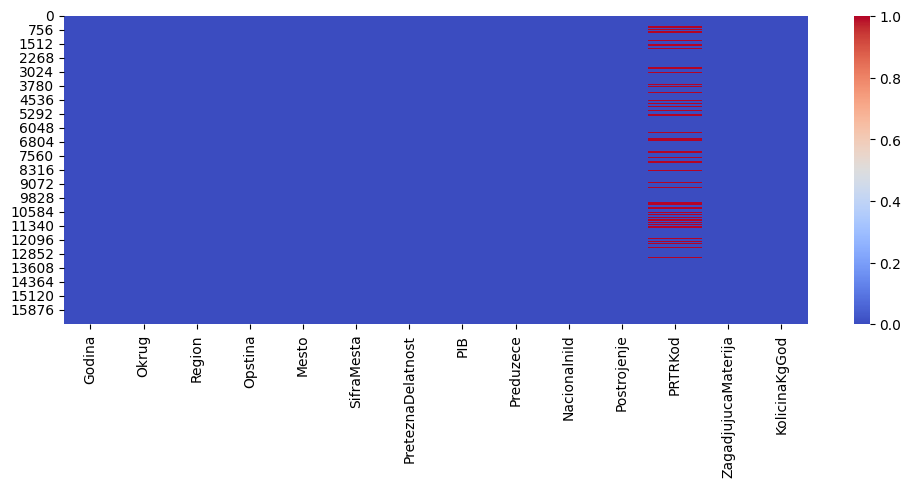

In [32]:
# heatmap podataka koji nedostaju
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cmap='coolwarm')
plt.show()

In [33]:
# Provera dupliranih redova
duplirani_redovi = df.duplicated().sum()
print(f"Broj dupliranih redova: {duplirani_redovi}")

Broj dupliranih redova: 0


In [34]:
# Prikazati sve zagadjivače u datasetu
df['ZagadjujucaMaterija'].unique()

array(['arsen i jedinjenja arsena (kao as)',
       'bakar i jedinjenja bakra (kao cu)',
       'cink i jedinjenja cinka (kao zn)',
       'kadmijum i jedinjenja kadmijuma (kao cd)',
       'nikl i jedinjenja nikla (kao ni)',
       'olovo i jedinjenja olova (kao pb)', 'hloridi (kao ukupni cl)',
       'hrom i jedinjenja hroma (kao cr)', 'fluoridi (ukupni f)',
       'ukupni azot', 'ukupni fosfor', 'fenoli (kao ukupni c)',
       'živa i jedinjenja žive (kao hg)', 'hloro-alkani, c10-c13',
       'benzo (g,h,i) perilen', 'fluoranten',
       'halogenovana organska jedinjenja (kao aox)',
       'policiklični aromatični ugljovodonici (pahs)',
       'ukupni organski ugljenik (toc) (ukupni c ili cod/3)',
       'cijanidi (ukupni cn)', 'benzen', 'etil benzen', 'toluen',
       'ksileni (o-, m- i p- ksilen) (kao ukupni ksileni)',
       'trihloroetilen', 'aldrin', 'ddt', 'dieldrin', 'heptahlor',
       'hlordan', 'lindan', 'polihlorovani bifenili (pcbs)', 'atrazin',
       'endosulfan', 'end

In [35]:
# Provera osnovne statistike za kolonu KolicinaKgGod
print(df['KolicinaKgGod'].describe())

count    1.661700e+04
mean     5.927335e+05
std      5.570005e+07
min      0.000000e+00
25%      3.000000e-01
50%      1.190000e+01
75%      5.626000e+02
max      7.169698e+09
Name: KolicinaKgGod, dtype: float64


*Komentar:*Ovu statistuku treba posmatrati uslovno, uzimajući u obzir da u koloni 'ZagadjujucaMaterija' imamo veći broj pojedinačno identifikovanih zagadjivača koji sublimirano prikazuju u masi statistiku za kolonu 'KolicinaKgGod'.Visoka standardna devijacija znači da emisije nisu uniformne, već da postoje veliki skokovi među pojedinačnim unosima. U ovom slučaju, standardna devijacija je mnogo veća od prosečne vrednosti, što ukazuje na velike razlike u emisijama između sektora i lokacija.

In [36]:
# alternativna statistika za kategorijsku kolonu
print(f'Broj jedinstvenih zagađujućih čestica u datasetu je: {df["ZagadjujucaMaterija"].nunique()}')  # Broj jedinstvenih vrednosti
print(df["ZagadjujucaMaterija"].value_counts())  # Frekvencija vrednosti

Broj jedinstvenih zagađujućih čestica u datasetu je: 80
ZagadjujucaMaterija
ukupni fosfor                                            1689
ukupni azot                                              1564
hloridi (kao ukupni cl)                                  1342
cink i jedinjenja cinka (kao zn)                         1195
bakar i jedinjenja bakra (kao cu)                        1093
                                                         ... 
1,2,3,4,5, 6-heksahlorocikloheksan (hch)                    1
tributilkalaj i jedinjenja (kao ukupni tributilkalaj)       1
pentahlorofenol (pcp)                                       1
trifenilkalaj i jedinjenja (kao ukupni trifenilkalaj)       1
vinil hlorid                                                1
Name: count, Length: 80, dtype: int64


In [37]:
# Generisanje automatske poruke za top 5 zagađujućih materija
top_pollutants = df["ZagadjujucaMaterija"].value_counts().head(5)

message = f"**Analiza zagađujućih materija**\n"
message += f"U datasetu je identifikovano ukupno {df['ZagadjujucaMaterija'].nunique()} jedinstvenih zagađujućih materija.\n"
message += "Top 5 najčešće prisutnih su:\n\n"

for i, (pollutant, count) in enumerate(top_pollutants.items(), start=1):
    message += f"{i}️**{pollutant}** – {count} pojavljivanja\n"

message += "\n Ove materije igraju ključnu ulogu u analizi emisija i mogu ukazati na dominantne izvore zagađenja."

print(message)

**Analiza zagađujućih materija**
U datasetu je identifikovano ukupno 80 jedinstvenih zagađujućih materija.
Top 5 najčešće prisutnih su:

1️**ukupni fosfor** – 1689 pojavljivanja
2️**ukupni azot** – 1564 pojavljivanja
3️**hloridi (kao ukupni cl)** – 1342 pojavljivanja
4️**cink i jedinjenja cinka (kao zn)** – 1195 pojavljivanja
5️**bakar i jedinjenja bakra (kao cu)** – 1093 pojavljivanja

 Ove materije igraju ključnu ulogu u analizi emisija i mogu ukazati na dominantne izvore zagađenja.


In [38]:
# Identifikujemo prisustvo outlier-a, koliko ih ima u datasetu i koliki je njihov procenat učešća u datasetu
# Outlier-e tražimo u koloni KolicinaKgGod pošto je njen dtype int64

# IQR metoda za detekciju outliera u koloni KolicinaKgGod
def count_outliers_kolicina(df, column):
    total_rows = len(df)
    
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Broj outliera u odabranoj koloni
    num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    percentage_outliers = (num_outliers / total_rows) * 100

    return num_outliers, round(percentage_outliers, 2)

# Poziv funkcije za kolonu 'KolicinaKgGod'
num_outliers, percent_outliers = count_outliers_kolicina(df, "KolicinaKgGod")

# Prikaz rezultata
print(f'Ukupan broj outliera u koloni KolicinaKgGod: {num_outliers}')
print(f'Procenat outliera u koloni KolicinaKgGod: {percent_outliers}%')

Ukupan broj outliera u koloni KolicinaKgGod: 3374
Procenat outliera u koloni KolicinaKgGod: 20.3%


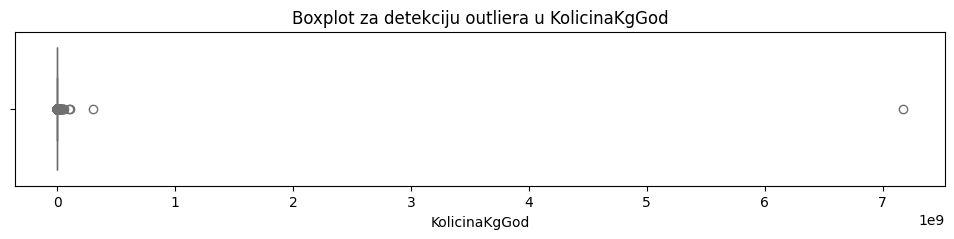

In [39]:
# Boxplot za identifikaciju outliera

# Kreiranje figure
plt.figure(figsize=(12, 2))
sns.boxplot(x=df["KolicinaKgGod"], color="skyblue")

# Dodavanje naslova i etiketa
plt.title("Boxplot za detekciju outliera u KolicinaKgGod")
plt.xlabel("KolicinaKgGod")

# Čuvanje slike
# plt.savefig("boxplot_kolicinaKgGod.png", dpi=100, bbox_inches="tight")

# Prikaz slike
plt.show()

In [40]:
# Možemo odrediti raspon vrednosti u kojima se nalaze outlieri u koloni KolicinaKgGod koristeći IQR metodu
# Izračunavanje kvartila
Q1 = np.percentile(df["KolicinaKgGod"], 25)
Q3 = np.percentile(df["KolicinaKgGod"], 75)
IQR = Q3 - Q1

# Granice outliera
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Outlieri se nalaze ispod {lower_bound} i iznad {upper_bound}.')

Outlieri se nalaze ispod -843.1500000000001 i iznad 1406.0500000000002.


In [41]:
# Raspon vrednosti outliera iznad gornje granice (upper_bound) u koloni KolicinaKgGod

# Izračunavanje kvartila i gornje granice
Q1 = np.percentile(df["KolicinaKgGod"], 25)
Q3 = np.percentile(df["KolicinaKgGod"], 75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Izolovanje outliera iznad gornje granice
outliers_above_upper = df[df["KolicinaKgGod"] > upper_bound]

# Raspon vrednosti tih outliera
min_outlier = outliers_above_upper["KolicinaKgGod"].min()
max_outlier = outliers_above_upper["KolicinaKgGod"].max()

print(f'Outlieri iznad gornje granice ({upper_bound}) se nalaze u rasponu: {min_outlier} - {max_outlier}')

Outlieri iznad gornje granice (1406.0500000000002) se nalaze u rasponu: 1406.1 - 7169697960.0


In [42]:
# Grupisanje po ZagadjujucaMaterija, sumiranje emisija i sortiranje
df_grouped = df.groupby("ZagadjujucaMaterija")["KolicinaKgGod"].sum().sort_values(ascending=False).head(10)
# Prikaz rezultata
print(df_grouped)

ZagadjujucaMaterija
hloridi (kao ukupni cl)                                8.607888e+09
hemijska potrošnja kiseonika (hpk)                     4.732542e+08
biohemijska potrošnja kiseonika (bpk5)                 3.031189e+08
ukupni azot                                            1.784859e+08
ukupni organski ugljenik (toc) (ukupni c ili cod/3)    1.751840e+08
ukupni fosfor                                          5.300796e+07
ukupni neorganski azot (nh4-n, no3-n, no2-n)           1.953887e+07
fluoridi (ukupni f)                                    1.881092e+07
nitrati (no3-n)                                        5.643382e+06
amonijak, izražen preko azota (nh4-n)                  5.368970e+06
Name: KolicinaKgGod, dtype: float64


*Komentar:*
- Dominantna zagađujuća materija – Hloridi (kao ukupni Cl) su daleko najdominantniji sa emisijom od 8.6 milijardi kg godišnje. Ova vrednost značajno odskače od ostalih, što može ukazivati na specifične industrijske izvore ili procesne vode koje doprinose visokoj koncentraciji hlorida.
- Potrošnja kiseonika – Hemijska i biohemijska potrošnja kiseonika (HPK i BPK5) su među vodećim indikatorima organskih zagađenja, što sugeriše značajno prisustvo bioorganskih materijala koji utiču na kvalitet vode.
- Azot i fosfor – Ukupni azot i ukupni fosfor su među najčešće prisutnim nutrijentima u emisijama, što je važno za analizu eutrofikacije voda i potencijalnih negativnih ekoloških uticaja.
- Fluoridi i nitrati – Prisustvo fluorida može biti povezano sa industrijskim procesima (proizvodnja aluminijuma, stakla, hemijska industrija), dok nitrati (NO3-N) ukazuju na moguće poljoprivredne izvore zagađenja (veštačka đubriva, otpadne vode).

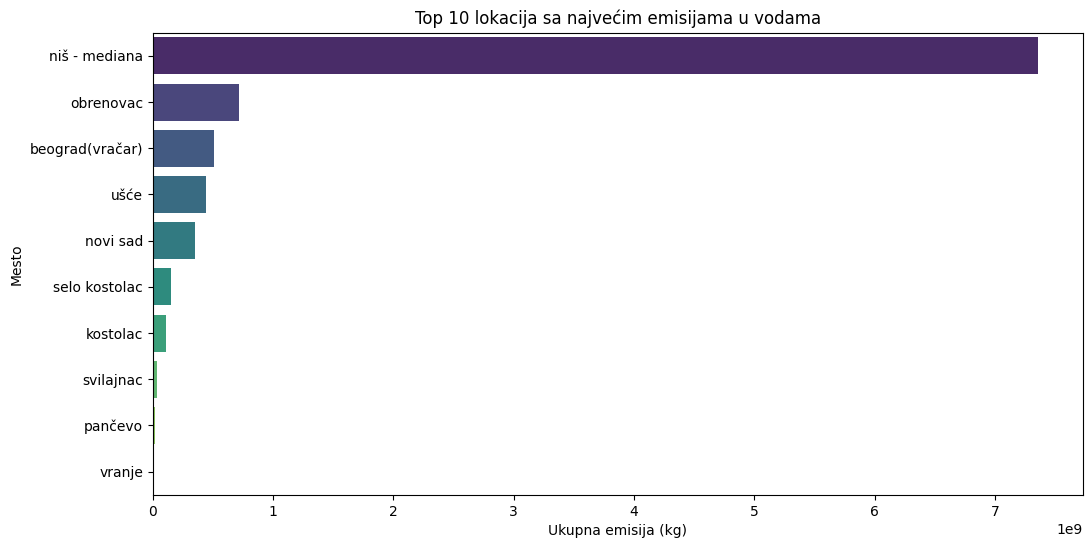

In [44]:
# Grupisanje i sumiranje emisija po mestima
df_geo = df.groupby("Mesto")["KolicinaKgGod"].sum().sort_values(ascending=False).head(10)

# Kreiranje figure
plt.figure(figsize=(12, 6))

# Barplot bez anotacija
sns.barplot(x=df_geo.values, y=df_geo.index, hue=df_geo.index, palette="viridis", legend=False)

# Podešavanje naslova i ose
plt.title("Top 10 lokacija sa najvećim emisijama u vodama")
plt.xlabel("Ukupna emisija (kg)")
plt.ylabel("Mesto")

# Čuvanje slike
plt.savefig("emisije_po_lokaciji_bez_anotacija.png", dpi=100, bbox_inches="tight")
plt.show()

Na osnovu bar dijagrama koji prikazuje top 10 lokacija sa najvećim emisijama, mogu se uočiti nekoliko ključnih aspekata:

- Dominantna lokacija – Niš - Mediana se izdvaja kao mesto sa najvećim emisijama, značajno više od ostalih. Ovo može ukazivati na specifične industrijske aktivnosti ili izvore zagađenja u tom području.
- Razlike između lokacija – Postoji očigledan jaz između prvih nekoliko lokacija (Beograd, Obrenovac, Ušće, Novi Sad) i ostalih, što može značiti da su određene industrije ili postrojenja glavni faktori emisija.
- Geografska distribucija – Većina lokacija su urbanizovane oblasti (Niš, Beograd - Vračar, Novi Sad), ali ima i manjih mesta poput Selo Kostolac, što može signalizirati prisustvo industrijskih postrojenja ili specifične regionalne aktivnosti.

In [45]:
# Grupisanje po zagađujućoj materiji i izračunavanje prosečne emisije
df_avg = df.groupby("ZagadjujucaMaterija")["KolicinaKgGod"].mean().sort_values(ascending=False)
# Prikaz rezultata
print(df_avg.head(10))  # Top 10 materija sa najvećom prosečnom emisijom

ZagadjujucaMaterija
hloridi (kao ukupni cl)                                6.414224e+06
hemijska potrošnja kiseonika (hpk)                     8.288165e+05
ukupni organski ugljenik (toc) (ukupni c ili cod/3)    6.393577e+05
biohemijska potrošnja kiseonika (bpk5)                 5.374449e+05
ukupni neorganski azot (nh4-n, no3-n, no2-n)           2.751954e+05
ukupni azot                                            1.141214e+05
fluoridi (ukupni f)                                    4.107187e+04
nitrati (no3-n)                                        3.206467e+04
ukupni fosfor                                          3.138423e+04
amonijak, izražen preko azota (nh4-n)                  2.982761e+04
Name: KolicinaKgGod, dtype: float64


Ovaj korak nam daje prosečne vrednosti emisija za svaku zagađujuću materiju u dataset-u, što omogućava uvid u tipove zagađenja koji generišu najveće godišnje emisije.

Ovi rezultati pružaju značajne uvide u prosečne emisije različitih zagađujućih materija u datasetu:

- Hloridi dominiraju – Hloridi (kao ukupni Cl) imaju daleko najveću prosečnu emisiju (6.41 miliona kg godišnje). Ovo ukazuje na njihovu učestalu prisutnost u velikim količinama, verovatno usled industrijskih procesa, otpadnih voda ili korišćenja dezinfekcionih sredstava.
- Potrošnja kiseonika – Hemijska (HPK) i biohemijska potrošnja kiseonika (BPK5) su takođe među vodećim parametrima, što sugeriše značajan uticaj organskih zagađenja na kvalitet vode. HPK meri ukupnu oksidaciju materijala, dok BPK5 ukazuje na biološki razgradive materijale.
- Organski ugljenik i azotne materije – Visoke emisije ukupnog organskog ugljenika (TOC) i neorganskih azotnih materija (NH4-N, NO3-N, NO2-N) govore o prisustvu poljoprivrednih otpadnih voda, kanalizacionih sistema ili industrijskih procesa koji oslobađaju azotne jedinjenja.
- Fluoridi i nitrati – Iako u manjoj meri, fluoridi i nitrati su prisutni u značajnim količinama, što može ukazivati na poljoprivredne aktivnosti ili industrijske procese vezane za hemijsku proizvodnju.

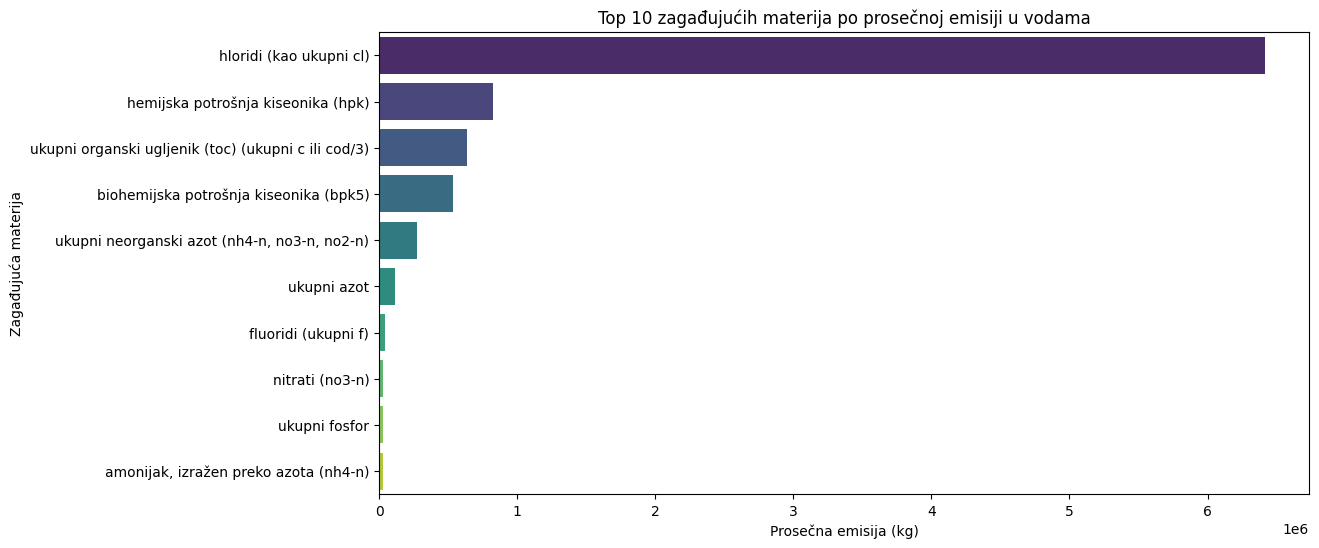

In [46]:
# Grupisanje po zagađujućoj materiji i izračunavanje prosečne emisije
df_avg = df.groupby("ZagadjujucaMaterija")["KolicinaKgGod"].mean().sort_values(ascending=False)

# Uzmi top 10 materija sa najvećom prosečnom emisijom
df_avg_top10 = df_avg.head(10)

# Kreiranje figure
plt.figure(figsize=(12, 6))

# Barplot sa ispravljenom sintaksom
sns.barplot(x=df_avg_top10.values, y=df_avg_top10.index, hue=df_avg_top10.index, palette="viridis", legend=False)

# Podešavanje naslova i ose
plt.title("Top 10 zagađujućih materija po prosečnoj emisiji u vodama")
plt.xlabel("Prosečna emisija (kg)")
plt.ylabel("Zagađujuća materija")

# Čuvanje slike
# plt.savefig("top10_materija_prosecna_emisija.png", dpi=100, bbox_inches="tight")
plt.show()

In [47]:
# ukupne emitovane količine zagađujućih materija za svaku godinu
# Grupisanje po godini i sumiranje emisija
df_trend = df.groupby("Godina")["KolicinaKgGod"].sum().reset_index()

# Prikaz tabele sa ukupnim emisijama po godini
print(df_trend)

# Opciono: Sačuvaj tabelu kao CSV fajl za dalju analizu
# df_trend.to_csv("ukupna_emisija_po_godinama.csv", index=False)

    Godina  KolicinaKgGod
0     2012   1.353021e+08
1     2013   1.079459e+08
2     2014   1.867132e+08
3     2015   1.175255e+08
4     2016   1.034959e+08
5     2017   1.389706e+08
6     2018   1.376241e+08
7     2019   1.112111e+08
8     2020   3.034195e+08
9     2021   7.895394e+09
10    2022   3.207072e+08
11    2023   2.911434e+08


Ovde imamo pregled kumulativnih godišnjih emisija svih zagađujućih materija u dataset-u, omogućavajući analizu trenda promena tokom vremena.

Rezultati pokazuju varijacije u ukupnim emisijama zagađujućih materija kroz godine:

- Stabilni period (2012–2019) – Emisije su uglavnom bile u rasponu od 100 do 180 miliona kg godišnje, s manjim fluktuacijama. Ovo može značiti relativno konstantne izvore zagađenja bez velikih promena u regulaciji ili industrijskim aktivnostima.
- Naglo povećanje 2020. godine – Skok na 303 miliona kg može ukazivati na specifičan događaj—industrijske promene, ekološke katastrofe, ili čak efekat pandemije (promene u industriji, tretman otpadnih voda).
- **Ekstremna anomalija 2021. godine** – Ogromna emisija od 7.9 milijardi kg verovatno ukazuje na grešku u podacima, značajan industrijski incident ili specifičnu promenu u metodologiji prikupljanja podataka. Ovo treba detaljno ispitati.
- Postpandemijski trend (2022–2023) – Emisije su se stabilizovale, ali su ostale nešto više nego pre 2020. godine (2.9 do 3.2 milijarde kg). Ovo može značiti dugoročne posledice prethodnih skokova u emisijama.

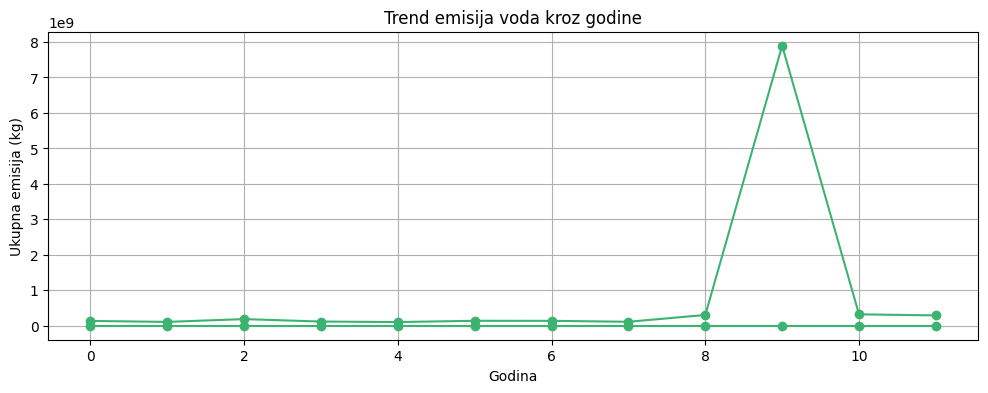

In [48]:
# Grafik trend emisija na godišnjem nivou
plt.figure(figsize=(12, 4))
plt.plot(df_trend.index, df_trend.values, marker="o", linestyle="-", color="MediumSeaGreen")

# Podešavanje naslova i ose
plt.title("Trend emisija voda kroz godine")
plt.xlabel("Godina")
plt.ylabel("Ukupna emisija (kg)")
plt.grid()

# Čuvanje slike
plt.savefig("trend_emisija_godine.png", dpi=100, bbox_inches="tight")
plt.show()

*Grafik:* Na dijagramu se može videti da imamo nagli skok za 2021 godinu. Uradili smo još jednom proveru podataka iz dataseta za 2021 godinu. 
Pivot tabelom potvrđeno da je za 2021 godinu ukupna emisija zagađujućih materija u iznosu po mernoj jedinici kilogram u apsolutnom iznosu:7,895e9. 

<Figure size 1200x600 with 0 Axes>

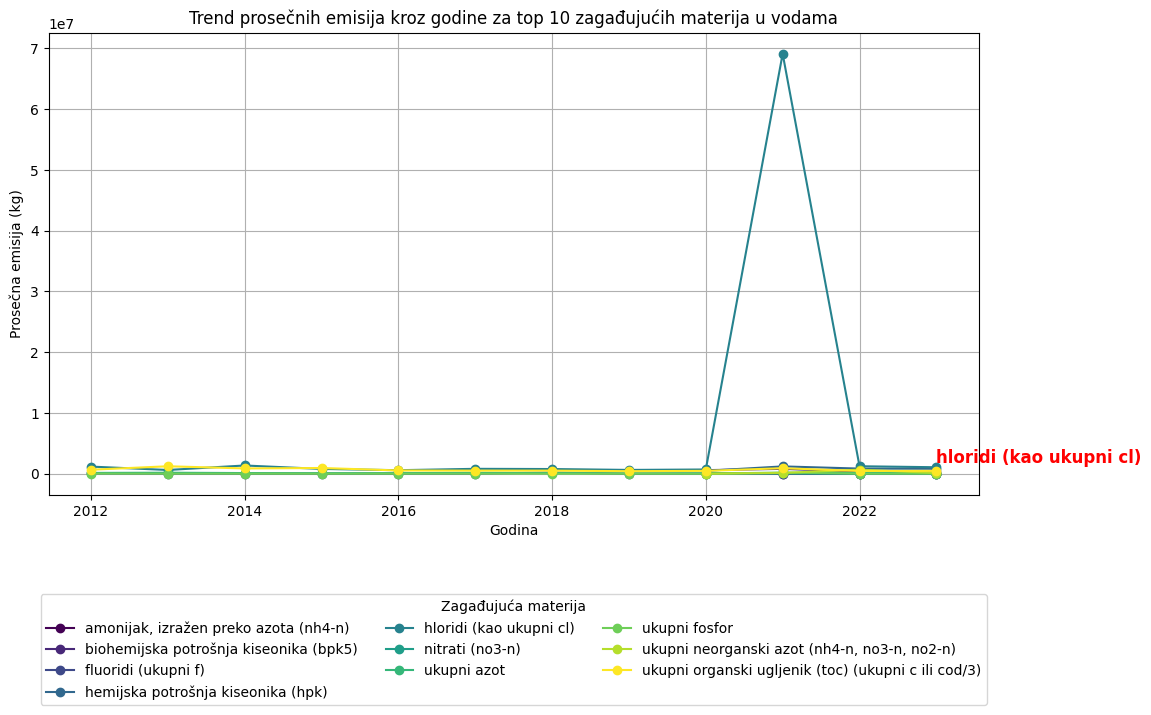

In [50]:
# Vizualizacija trendova prosečnih godišnjih emisija za top 10 zagađujućih materija

# Filtriranje dataset-a samo za zagađujuće materije
df_materije = df.groupby("ZagadjujucaMaterija")["KolicinaKgGod"].sum().nlargest(10).index

# Filtriranje dataset-a samo za top 10 materija
df_top_materije = df[df["ZagadjujucaMaterija"].isin(df_materije)]

# Grupisanje po godinama i materijama – izračunavanje prosečnih emisija
df_trend_top10 = df_top_materije.groupby(["Godina", "ZagadjujucaMaterija"])["KolicinaKgGod"].mean().unstack()

# Kreiranje figure
plt.figure(figsize=(12, 6))

# Linijski grafik za prosečne emisije po godinama
df_trend_top10.plot(kind="line", marker="o", figsize=(12, 6), colormap="viridis")

# Podešavanje naslova i ose
plt.title("Trend prosečnih emisija kroz godine za top 10 zagađujućih materija u vodama")
plt.xlabel("Godina")
plt.ylabel("Prosečna emisija (kg)")
plt.grid()

# Identifikacija materije sa najvećim prosečnim emisijama
materija_max = df_trend_top10.mean().idxmax()

# Dodavanje oznake samo za materiju sa najvećim prosečnim emisijama
x = df_trend_top10.index[-1]  # Poslednja godina
y = df_trend_top10[materija_max].iloc[-1]  # Poslednja vrednost emisije
plt.text(x, y, materija_max, fontsize=12, fontweight="bold", color="red", verticalalignment='bottom', horizontalalignment='left')

# Pomera legendu dole ispod grafikona
plt.legend(title="Zagađujuća materija", bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=3)

# Čuvanje slike
plt.savefig("trend_prosecnih_emisija_top10_legend_dole.png", dpi=100, bbox_inches="tight")
plt.show()

Na grafikonu se jasno uočava nagli skok emisija hlorida u 2021. godini, što predstavlja ključan detalj u analizi trendova. Ovaj porast može ukazivati na specifičan ekološki ili industrijski događaj, promene u regulativama, ili metodološku prilagodbu u prikupljanju podataka.

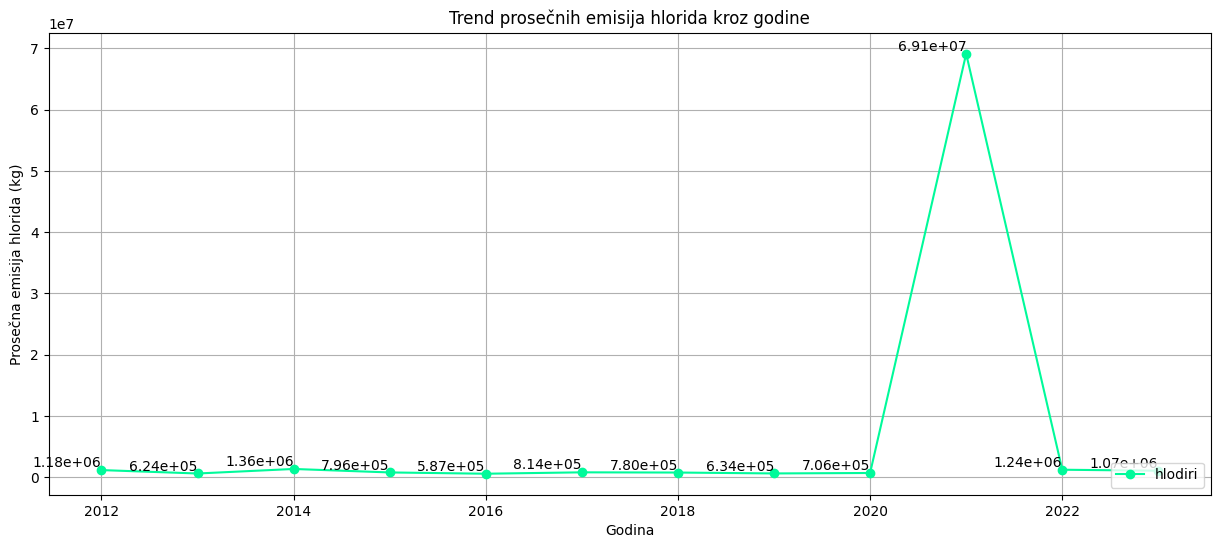

In [58]:
# Prosečne godišnje vrednosti emisija samo za hloride i njihov prikaz na linijskom grafikonu

# Filtriranje dataset-a samo za hloride
df_hloridi = df[df["ZagadjujucaMaterija"] == 'hloridi (kao ukupni cl)']

# Grupisanje po godini – izračunavanje prosečne emisije za hloride
df_trend_hloridi = df_hloridi.groupby("Godina")["KolicinaKgGod"].mean()

# Kreiranje figure
plt.figure(figsize=(15, 6))

# Linijski grafik za hloride
plt.plot(df_trend_hloridi.index, df_trend_hloridi.values, marker="o", linestyle="-", color="MediumSpringGreen", label="hlodiri")

# Dodavanje numeričkih vrednosti na svaku tačku
for x, y in zip(df_trend_hloridi.index, df_trend_hloridi.values):
    plt.text(x, y, f"{y:.2e}", fontsize=10, verticalalignment='bottom', horizontalalignment='right', color="black")

# Podešavanje naslova i ose
plt.title("Trend prosečnih emisija hlorida kroz godine")
plt.xlabel("Godina")
plt.ylabel("Prosečna emisija hlorida (kg)")
plt.grid()

# Legenda sa hloride oznakom
plt.legend(loc="lower right")

# Čuvanje slike
plt.savefig("trend_prosecnih_emisija_hloridi_vrednosti.png", dpi=100, bbox_inches="tight")
plt.show()

Grafikon trenda prosečnih emisija hlorida kroz godine jasno pokazuje nekoliko ključnih obrazaca:
- Ekstreman skok u 2021. godini – Ovaj nagli porast emisija hlorida predstavlja ključan detalj u analizi. Može ukazivati na značajnu promenu u industrijskim procesima, ekološki incident ili regulativne promene koje su uticale na emisije.
- Stabilnost pre 2021. godine – U prethodnim godinama emisije su bile relativno konstantne, bez velikih oscilacija. Ovaj trend sugeriše da su izvori emisija uglavnom bili stabilni sve do pomenutog skoka.
- Postepeni pad nakon vrhunca – Nakon 2021. godine, emisije se ponovo stabilizuju, ali ostaju na nešto višem nivou u odnosu na period pre skoka. Ovo može značiti da su određeni faktori nastavili da utiču na emisije, ali ne u istoj meri.

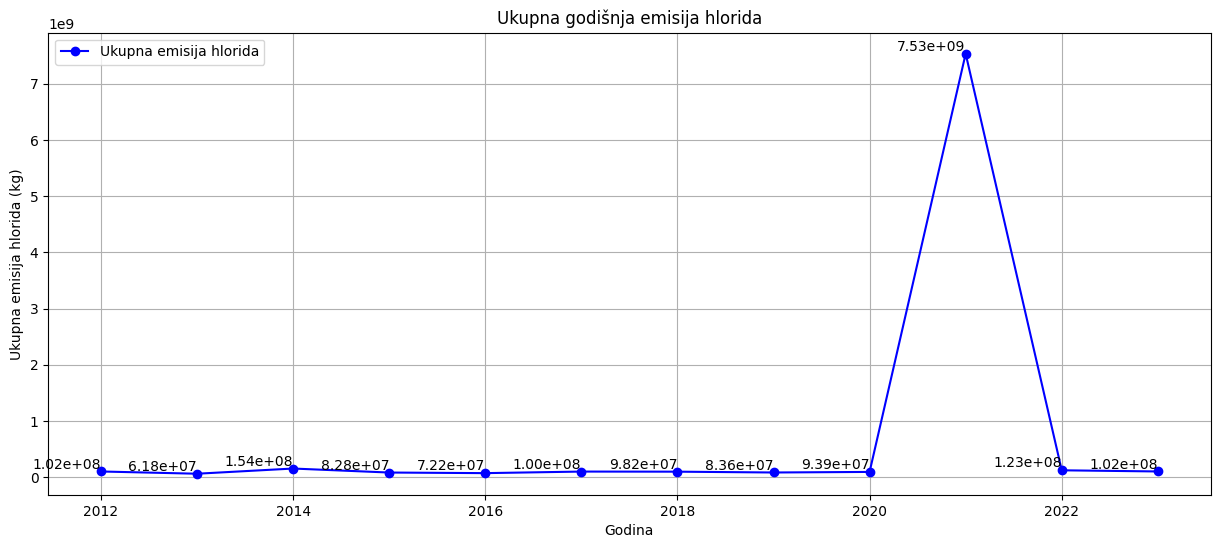

In [59]:
# Grafik ukupne godišnje emisije hlorida, koji će prikazati ukupnu emisiju hlorida za svaku godinu iz dataseta

# Filtriranje dataset-a samo za hloride
df_hloridi = df[df["ZagadjujucaMaterija"] == 'hloridi (kao ukupni cl)']

# Grupisanje po godini – sumiranje ukupne emisije hlorida
df_trend_hloridi_total = df_hloridi.groupby("Godina")["KolicinaKgGod"].sum()

# Kreiranje figure
plt.figure(figsize=(15, 6))

# Linijski grafik za ukupne emisije hlorida
plt.plot(df_trend_hloridi_total.index, df_trend_hloridi_total.values, marker="o", linestyle="-", color="blue", label="Ukupna emisija hlorida")

# Dodavanje numeričkih vrednosti na svaku tačku (naučni format)
for x, y in zip(df_trend_hloridi_total.index, df_trend_hloridi_total.values):
    plt.text(x, y, f"{y:.2e}", fontsize=10, verticalalignment='bottom', horizontalalignment='right', color="black")

# Podešavanje naslova i ose
plt.title("Ukupna godišnja emisija hlorida")
plt.xlabel("Godina")
plt.ylabel("Ukupna emisija hlorida (kg)")
plt.grid()

# Legenda sa oznakom za hloride
plt.legend(loc="upper left")

# Čuvanje slike
plt.savefig("trend_ukupne_emisije_hloridi.png", dpi=100, bbox_inches="tight")
plt.show()

In [60]:
# Mesta i preduzeca sa najvecim izmerenim kolicinama hlorida. Top 10 mesta i preduzeca

# Filtriranje dataset-a samo za hloride
df_hloridi = df[df["ZagadjujucaMaterija"] == 'hloridi (kao ukupni cl)']

# Grupisanje po mestu – pronalaženje maksimalne emisije i odgovarajuće godine i preduzeća
df_godine_max = df_hloridi.loc[df_hloridi.groupby("Mesto")["KolicinaKgGod"].idxmax(), ["Mesto", "Preduzece", "Godina", "KolicinaKgGod"]]

# Prikaz rezultata
print("Mesta sa najvećim emisijama hlorida, godinu kada je zabeležena maksimalna vrednost, i preduzeće koje je najveći emiter:")
df_godine_max.sort_values(by="KolicinaKgGod", ascending=False).head(10)

Mesta sa najvećim emisijama hlorida, godinu kada je zabeležena maksimalna vrednost, i preduzeće koje je najveći emiter:


,Mesto,Preduzece,Godina,KolicinaKgGod
12117,niš - mediana,jkp za vodu i kanalizaciju naissus niš,2021,7.169698e+09
11576,obrenovac,akcionarsko društvo „elektroprivreda srbije“,2021,3.012631e+08
2196,ušće,pd termoelektrane nikola tesla,2014,1.100111e+08
60,kostolac,pd termoelektrane i kopovi kostolac,2012,2.798782e+07
266,beograd(vračar),javno komunalno preduzeće beogradski vodovod i...,2012,1.655280e+07
5502,selo kostolac,akcionarsko društvo „elektroprivreda srbije“,2017,1.509600e+07
11894,novi sad,javno komunalno preduzeće vodovod i kanalizaci...,2021,1.311643e+07
9794,leskovac,javno komunalno preduzeä†e vodovod leskovac,2020,1.497528e+06
512,šabac,vodovod šabac,2012,1.445520e+06
14192,svilajnac,akcionarsko društvo „elektroprivreda srbije“,2022,1.294357e+06


Na osnovu podataka o mestima i preduzećima sa najvećim emisijama hlorida, mogu se izvući sledeći zaključci:

- Ekstremna emisija u Nišu - Mediana (2021) – Ovaj rekordni iznos od 7.17 milijardi kg hlorida daleko premašuje sve druge vrednosti, što može ukazivati na specifičan incident, grešku u unosu podataka ili značajnu promenu u industrijskom procesu.
- Visoka emisija u Obrenovcu (2021) – Elektroprivreda Srbije zabeležila je 301 miliona kg hlorida u 2021. godini, što sugeriše povezanost s industrijskim procesima, verovatno termoelektranama.
- **Dominacija energetskih i komunalnih postrojenja – Većina najvećih emitera hlorida su termoelektrane, vodovodi i kanalizacioni sistemi, što implicira da industrijska proizvodnja i tretman voda igraju ključnu ulogu u emisijama ove materije.**
- Regionalna rasprostranjenost – Gradovi poput Niša, Beograda, Novog Sada i Leskovca pokazuju visoke emisije, ali zanimljivo je da i manja mesta poput Šabca, Kostolca i Svilajnca imaju značajne vrednosti, verovatno zbog industrijskih postrojenja.

<Figure size 1200x600 with 0 Axes>

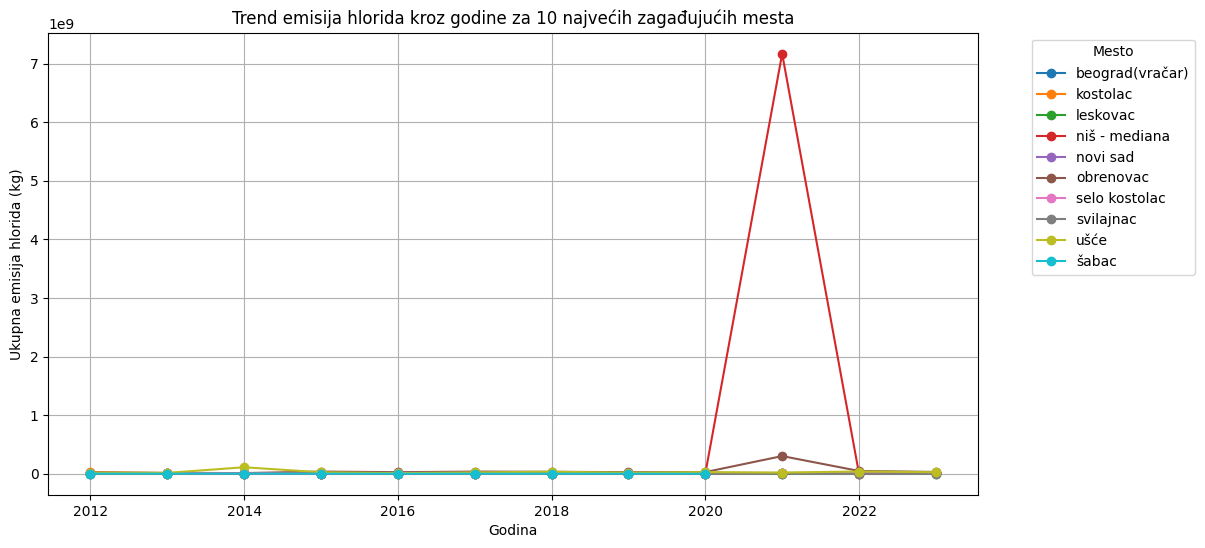

In [61]:
# Vizualizacija trendova emisija hlorida kroz godine za najveća zagađujuća mesta

# Filtriranje dataset-a samo za hlorida
df_hloridi = df[df["ZagadjujucaMaterija"] == 'hloridi (kao ukupni cl)']

# Identifikacija top 10 mesta sa najvećim emisijama hlorida
top_mesta = df_hloridi.groupby("Mesto")["KolicinaKgGod"].sum().nlargest(10).index

# Filtriranje dataset-a samo za top 10 mesta
df_top_mesta = df_hloridi[df_hloridi["Mesto"].isin(top_mesta)]

# Grupisanje po godinama i mestima – sumiranje emisija hlorida
df_trend_mesta = df_top_mesta.groupby(["Godina", "Mesto"])["KolicinaKgGod"].sum().unstack()

# Kreiranje figure
plt.figure(figsize=(12, 6))

# Linijski grafik samo za top 10 mesta
df_trend_mesta.plot(kind="line", marker="o", figsize=(12, 6), colormap="tab10")

# Podešavanje naslova i ose
plt.title("Trend emisija hlorida kroz godine za 10 najvećih zagađujućih mesta")
plt.xlabel("Godina")
plt.ylabel("Ukupna emisija hlorida (kg)")
plt.grid()

# Legenda sa nazivima mesta
plt.legend(title="Mesto", bbox_to_anchor=(1.05, 1), loc="upper left")

# Čuvanje slike
plt.savefig("trend_emisija_hloridi_top10_mesta.png", dpi=100, bbox_inches="tight")
plt.show()

Grafikon koji prikazuje trend emisija hlorida kroz godine za 10 najvećih zagađujućih mesta otkriva nekoliko ključnih detalja:

- Dominacija Niša - Mediana u 2021. – Jasno se vidi ekstreman skok emisija u 2021. godini, koji daleko prevazilazi sve ostale vrednosti. Ovo može ukazivati na specifičan industrijski proces, ekološki incident ili čak metodološku promenu u prikupljanju podataka.
- Obrenovac i Ušće kao stalni emitenti – Ove lokacije pokazuju konzistentno visoke vrednosti emisija kroz godine, što sugeriše da su veliki industrijski ili energetski objekti kontinuirani izvori hlorida u vodi.
- Fluktuacije na drugim lokacijama – Dok su neke lokacije imale stabilne emisije, kod drugih se primećuju skokovi i padovi u različitim godinama, što može značiti sezonske ili regulatorne uticaje.

In [64]:
# Identifikovati pretežne delatnosti i regione sa najvećim emisijama hlorida prema dataset-u

# Filtriranje dataset-a samo za hloride
df_hloridi = df[df["ZagadjujucaMaterija"] == 'hloridi (kao ukupni cl)']

# Grupisanje po pretežnoj delatnosti – sumiranje emisija hlorida
df_emisije_po_delatnosti = df_hloridi.groupby("PreteznaDelatnost")["KolicinaKgGod"].sum().nlargest(10)

# Grupisanje po regionima – sumiranje emisija hlorida
df_emisije_po_regionu = df_hloridi.groupby("Region")["KolicinaKgGod"].sum().nlargest(10)

# Grupisanje po PIB-u i preduzećima – sumiranje emisija hlorida
df_emisije_po_preduzecu = df_hloridi.groupby(["PIB", "Preduzece"])["KolicinaKgGod"].sum().nlargest(10)

# Prikaz rezultata u tabelarnom formatu
print("Delatnosti sa najvećim emisijama hlorida:")
print(df_emisije_po_delatnosti)

print("\nRegioni sa najvećim emisijama hlorida:")
print(df_emisije_po_regionu)

print("\nPreduzeća sa najvećim emisijama hlorida (sa PIB-om):")
print(df_emisije_po_preduzecu)

Delatnosti sa najvećim emisijama hlorida:
PreteznaDelatnost
3600 skupljanje, prečišćavanje i distribucija vode         7.386289e+09
3514 trgovina električnom energijom                        9.469881e+08
3511 proizvodnja električne energije                       2.637891e+08
1712 proizvodnja papira i kartona                          1.956851e+06
3530 snabdevanje parom i klimatizacija                     1.742875e+06
0520 eksploatacija lignita i mrkog uglja                   1.334197e+06
2015 proizvodnja veštačkih đubriva i azotnih jedinjenja    1.127778e+06
1051 prerada mleka i proizvodnja sireva                    1.103599e+06
1011 prerada i konzervisanje mesa                          1.023978e+06
2410 proizvodnja sirovog gvožđa, čelika i ferolegura       4.356265e+05
Name: KolicinaKgGod, dtype: float64

Regioni sa najvećim emisijama hlorida:
Region
region južne i istočne srbije       7.436639e+09
beogradski region                   1.090091e+09
region vojvodine                    5.9

PIB        Preduzece                                                                                                       
100667004  jkp za vodu i kanalizaciju naissus niš                                                                              7.194040e+09
103920327  akcionarsko društvo „elektroprivreda srbije“                                                                        9.469881e+08
101217456  pd termoelektrane nikola tesla                                                                                      1.894242e+08
100346317  javno komunalno preduzeće beogradski vodovod i kanalizacija                                                         1.094761e+08
104199176  pd termoelektrane i kopovi kostolac                                                                                 7.436487e+07
100237118  javno komunalno preduzeće vodovod i kanalizacija novi sad                                                           5.421962e+07
100524193  javno komunalno preduzeä†

Ovi podaci jasno ukazuju na ključne delatnosti, regione i preduzeća sa najvećim emisijama hlorida u vodi. Evo nekoliko važnih zapažanja:

- Dominacija komunalnog sektora – Skupljanje, prečišćavanje i distribucija vode daleko prednjači sa 7.39 milijardi kg emisija hlorida. Ovo ukazuje da procesi tretmana vode igraju najveću ulogu u oslobađanju ove materije.
- Energetski sektor kao značajan faktor – Trgovina i proizvodnja električne energije zauzimaju sledeće dve pozicije, potvrđujući da termoelektrane i elektroprivreda imaju značajan doprinos emisijama.
- Najzagađeniji region je Južna i Istočna Srbija – Sa 7.43 milijardi kg hlorida, ovaj region se izdvaja kao dominantni izvor emisija, što može biti povezano sa industrijskim centrima ili specifičnim hidrološkim karakteristikama.
- Niš - Mediana i JKP Naissus Niš kao vodeći emiter – Ovo preduzeće ima 7.19 milijardi kg emisija, što značajno prevazilazi ostale emitere. Potrebno je detaljnije istražiti razlog ovako visokih vrednosti—da li je u pitanju specifičan ekološki događaj ili način na koji se otpadne vode tretiraju?

**Zaključak**
- Hloridi dominiraju kao najznačajnija zagađujuća materija Njihova emisija je više milijardi kilograma godišnje, sa ekstremnim porastom u 2021. godini, što sugeriše ozbiljne industrijske i komunalne izvore.
- Industrija i energetski sektor imaju najveći doprinos emisijama Termoelektrane, komunalna preduzeća, prerada papira i hemijska industrija su dominantni faktori koji utiču na oslobađanje hlorida i drugih materija u vodene ekosisteme.
- Južna i Istočna Srbija su najpogođeniji regioni Sa više od 7 milijardi kg emisija hlorida, ovaj region se ističe kao najzagađeniji, što ukazuje na koncentraciju velikih industrijskih postrojenja ili specifične metode obrade vode.
- Niš - Mediana i JKP Naissus Niš kao glavni emiter Ekstremna emisija u 2021. godini (7.17 milijardi kg) zahteva dodatnu analizu—da li je posledica specifičnog ekološkog događaja, promene u metodama obrade vode ili nepravilnosti u podacima?
- Trend emisija pokazuje velike oscilacije kroz godine Period 2012–2019 je bio relativno stabilan, ali 2020–2021 donose nagle skokove, što može biti posledica industrijskih promena, ekoloških faktora ili grešaka u podacima.

In [65]:
df.columns

Index(['Godina', 'Okrug', 'Region', 'Opstina', 'Mesto', 'SifraMesta',
       'PreteznaDelatnost', 'PIB', 'Preduzece', 'NacionalniId', 'Postrojenje',
       'PRTRKod', 'ZagadjujucaMaterija', 'KolicinaKgGod'],
      dtype='object')

In [74]:
print(len(df['PreteznaDelatnost'].unique()))

72
